In [1]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
plv_hist = np.genfromtxt ('plv_hist.csv', delimiter=",")
plv_pi = np.genfromtxt ('plv_pi.csv', delimiter=",")
volc_sigl = -1*np.genfromtxt ('sigl.txt', delimiter=",")

volc_data = volc_sigl[1:997]
volc_data_mon = np.zeros((997*12))
volc_data_mon[0:6] = volc_data[0]
volc_data_mon[11958:11964] = volc_data[-1]
#volc_data_mon[6:18] = volc_data[1]
#volc_data_mon[18:24] = volc_data[2]
#volc_data_mon[24:36] = volc_data[2]
for yyyy in range(995):
    #print(yyyy)
    volc_data_mon[6+yyyy*12:18+yyyy*12] = volc_data[1+yyyy]
print(volc_data[0:10])
print(volc_data_mon[0:120])


#print(plv_hist.shape)
#print(plv_pi.shape)
#print(volc_data_mon[0:6])
#print(volc_data_mon[11958:])
#print(volc_data[-1])
#print(volc_data[:])

#data = pd.DataFrame(data, columns=['x', 'y'])
plv = np.zeros((plv_pi.shape[0], 2))
plv[:,0] = plv_pi[:]
plv[:,1] = plv_hist[0:11964]
#print(plv.shape)
plv_data = pd.DataFrame(plv, columns=['plv_pi', 'plv_hist'])
xy_line = (0, 1)
thres = 0.8
volc_thres = 3.7

[-0.   -0.    5.41 -0.   -0.   -0.   -0.   -0.    2.62 -0.  ]
[-0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.    5.41  5.41  5.41  5.41  5.41  5.41  5.41
  5.41  5.41  5.41  5.41  5.41 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  2.62  2.62  2.62  2.62  2.62  2.62  2.62  2.62  2.62  2.62  2.62  2.62
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.  ]


98.1198
[  98.   98.  108. ...,  103.  106.   94.]


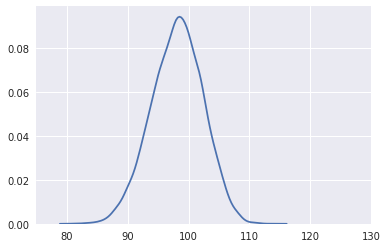

In [2]:
# 10 year PI control not considering first 200 years
import random
Nsample = plv[1200:,1].shape[0]
N=10000
thres = 0.5
dummy_log = np.zeros((120))
dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo[0:Nsample] = plv[1200:,0]
dummy_pi_scatter = np.zeros((N))

for niter in range(N):
    dummy = plv_pi_monte_carlo[random.sample(range(0, 8399), 120)]
    dummy_log[dummy<thres] = 0
    dummy_log[dummy>thres] = 1
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    dummy_pi_scatter[niter] = np.sum(dummy_log)
print(dummy_log_sum/N)
print(dummy_pi_scatter)
sns.kdeplot(dummy_pi_scatter).set(xlim=(75, 130))
plt.savefig('plv_pi_pdf.eps', format='eps', dpi=1000)

108.4474
9.11


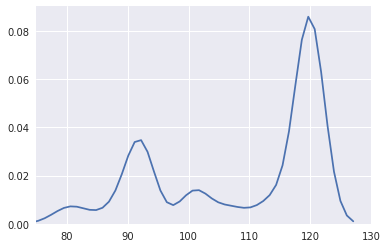

In [19]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.5
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo = plv[9600:10200,1]
niter = 0
dummy_hist_scatter_1650_1700 = np.zeros((N))
while niter < N:
    rand_year = random.sample(range(70, 11952), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]-60:rand_year[0]+60]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]-60:rand_year[0]+60]) < 0.1:
        continue
    dummy_hist_scatter_1650_1700[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    
print(dummy_log_sum/N)
print(np.sum(volc_data[800:850])-10.24)
#print(volc_data[800:850]) # include later
#print(dummy_hist_scatter_1650_1700[1100:1200])
#1650-1700
sns.kdeplot(dummy_hist_scatter_1650_1700[:]).set(xlim=(75, 130))
plt.savefig('plv_hist_pdf_1650_1700.eps', format='eps', dpi=1000)

In [20]:
# Since we are studying the impact of volcanic eruptions at max upto the decadal scale, we choose a 10 year
# period to sum over the Phase Locking Values for Volcanic eruptions in historical run. We have done this


115.4419
8.75
[-0.   -0.   -0.   -0.   -0.   -0.   -0.    0.8  -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.    0.41  0.66  0.84 -0.   -0.   -0.    0.51
 -0.   -0.   -0.    3.17 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  2.36 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.  ]


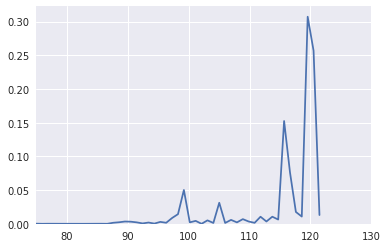

In [21]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.5
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo = plv[10200:10800,1]
niter = 0
dummy_hist_scatter_1700_1750 = np.zeros((N))

while niter < N:
    rand_year = random.sample(range(70, 11952), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]-60:rand_year[0]+60]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]-60:rand_year[0]+60]) < 0.1:
        continue
    dummy_hist_scatter_1700_1750[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
print(dummy_log_sum/N)
print(np.sum(volc_data[850:900]))
print(volc_data[850:900])
#1700-1750
sns.kdeplot(dummy_hist_scatter_1700_1750[:]).set(xlim=(75, 130))
plt.savefig('plv_hist_pdf_1700_1750.eps', format='eps', dpi=1000)

107.6876
14.29
[-0.   -0.   -0.    1.66 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.    1.58 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  0.43 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    4.34 -0.   -0.   -0.
 -0.    0.53 -0.   -0.   -0.   -0.    5.75 -0.   -0.   -0.   -0.   -0.  ]


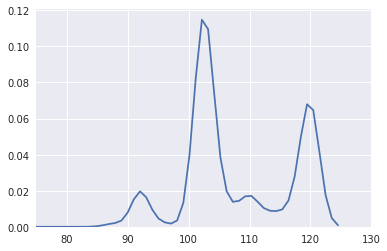

In [22]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.5
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo = plv[8400:9000,1]
niter = 0
dummy_hist_scatter_1550_1600 = np.zeros((N))


while niter < N:
    rand_year = random.sample(range(70, 11952), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]-60:rand_year[0]+60]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]-60:rand_year[0]+60]) < 0.1:
        continue
    dummy_hist_scatter_1550_1600[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
print(dummy_log_sum/N)
print(np.sum(volc_data[700:750]))
print(volc_data[700:750])
#1550-1600
sns.kdeplot(dummy_hist_scatter_1550_1600[:]).set(xlim=(75, 130))
plt.savefig('plv_hist_pdf_1550_1600.eps', format='eps', dpi=1000)

93.7765
[ 11.58  -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
  -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.48  -0.     1.73  -0.
  -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
  -0.    -0.    -0.     1.    -0.    -0.    -0.    11.84  -0.    -0.    -0.
  -0.     1.91  -0.    -0.    -0.    -0.  ]
5.12


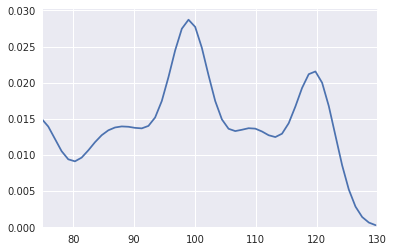

In [23]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.5
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo = plv[9000:9600,1]
niter = 0
dummy_hist_scatter_1600_1650 = np.zeros((N))

while niter < N:
    rand_year = random.sample(range(70, 11952), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]-60:rand_year[0]+60]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]-60:rand_year[0]+60]) < 0.1:
        continue
    dummy_hist_scatter_1600_1650[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
print(dummy_log_sum/N)
print(volc_data[750:800])
print(np.sum(volc_data[750:800])-11.58-11.84)
#1600-1650
sns.kdeplot(dummy_hist_scatter_1600_1650[:]).set(xlim=(75, 130))
plt.savefig('plv_hist_pdf_1600_1650.eps', format='eps', dpi=1000)

In [8]:
# Filtered out volcanoes above 8 W/m2 to understand the role of frequency of volcanic eruptions

In [9]:
# Plot a scatter plot of VRF v/s PLV for moving 50 y subsamples 
# excluding volcanic events above 8 W/m2 
# Which will also give the dataset of PLVs during that period
# Two results coming out from this analysis
# 1. increase in PLV with number of volcanic events 
# 2. maximum increase in PLV by 15 % using monte carlo analysis as Maruan and Kurths had suggested 
# decadal impacts of volcanic eruptions

In [10]:
# Box and Whisker plots

In [11]:
import pandas as pd
pi = pd.DataFrame({ 'group' : np.repeat('PI',10000), 'value': dummy_pi_scatter })
hist_1550_1600 = pd.DataFrame({ 'group' : np.repeat('A',10000), 'value': dummy_hist_scatter_1550_1600 })
hist_1600_1650 = pd.DataFrame({ 'group' : np.repeat('B',10000), 'value': dummy_hist_scatter_1600_1650 })
hist_1650_1700 = pd.DataFrame({ 'group' : np.repeat('C',10000), 'value': dummy_hist_scatter_1650_1700 })
hist_1700_1750 = pd.DataFrame({ 'group' : np.repeat('D',10000), 'value': dummy_hist_scatter_1700_1750 })

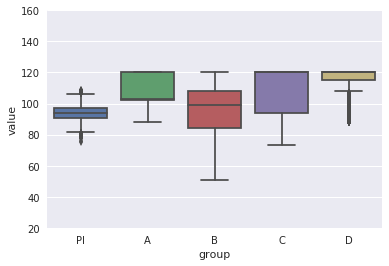

In [12]:
df=pi.append(hist_1550_1600).append(hist_1600_1650).append(hist_1650_1700).append(hist_1700_1750)
plt.ylim([20,160])
#sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(x='group', y='value', data=df)
plt.savefig('box_whisker.eps', format='eps', dpi=1000)

74.5112
[ 79.  74.  73. ...,  84.  79.  77.]


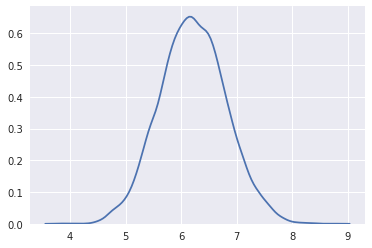

In [15]:
# 20 year PI control not considering first 200 years
import random
Nsample = plv[1200:,1].shape[0]
N=10000
thres = 0.9
dummy_log = np.zeros((240))
dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo[0:Nsample] = plv[1200:,0]
dummy_pi_scatter = np.zeros((N))

for niter in range(N):
    dummy = plv_pi_monte_carlo[random.sample(range(0, 8399), 240)]
    dummy_log[dummy<thres] = 0
    dummy_log[dummy>thres] = 1
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    dummy_pi_scatter[niter] = np.sum(dummy_log)
print(dummy_log_sum/N)
print(dummy_pi_scatter)
sns.kdeplot(dummy_pi_scatter/12)
#sns.kdeplot(dummy_pi_scatter).set(xlim=(75, 130))
#plt.savefig('plv_pi_pdf.eps', format='eps', dpi=1000)

In [16]:
# 20 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.5
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_hist_monte_carlo = np.zeros((Nsample))
plv_hist_monte_carlo = plv[:,1]
niter = 0
dummy_hist_scatter_0850_1850 = np.zeros((N))

while niter < N:
    rand_year = random.sample(range(130, 11952), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]-120:rand_year[0]+120]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]-120:rand_year[0]+120]) < 0.1:
        continue
    dummy_hist_scatter_0850_1850[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
print(dummy_log_sum/N)
print(volc_data[750:800])
print(np.sum(volc_data[750:800])-11.58-11.84)
#1600-1650
sns.kdeplot(dummy_hist_scatter_0850_1850[:])
#sns.kdeplot(dummy_hist_scatter_1550_1600[:]).set(xlim=(75, 130))


IndexError: index 120 is out of bounds for axis 1 with size 120